# GRIP The Sparks Foundation
Data Sciece and Business  Analytics intern
Task 1 - Prediction using Supervised ML

Author - Rohit Kasare

Goal - Predict the percentage of a student based on the number of study hours.
We will be using Simple Linear Regression.

Dataset link - http://bit.ly/w-data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
data = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv' #dataset url
df = pd.read_csv(data , sep= ',')
print("data is imported successfully")

data is imported successfully


In [7]:
df.head(8) #First 8 entries

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [8]:
df.isnull().sum() #isnull check null values

Hours     0
Scores    0
dtype: int64

In [9]:
df.describe()#gives description

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

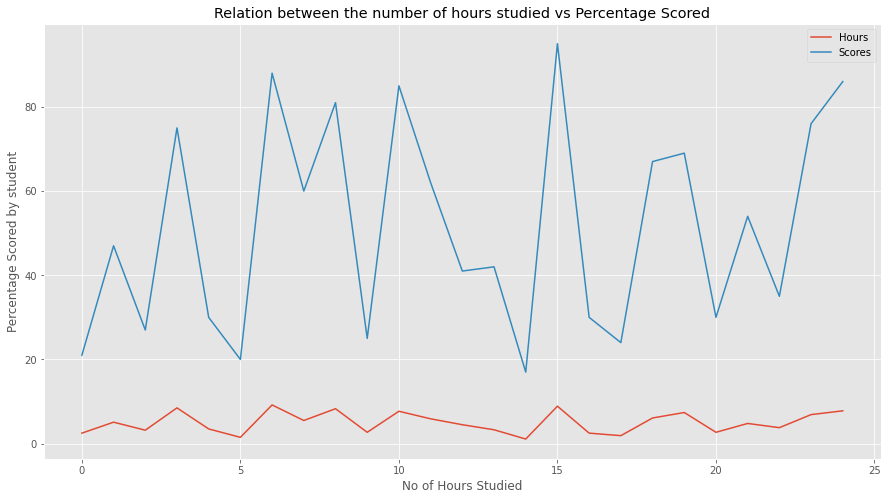

In [10]:
plt.style.use('ggplot')
df.plot(kind = 'line' , figsize = (15 , 8))
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

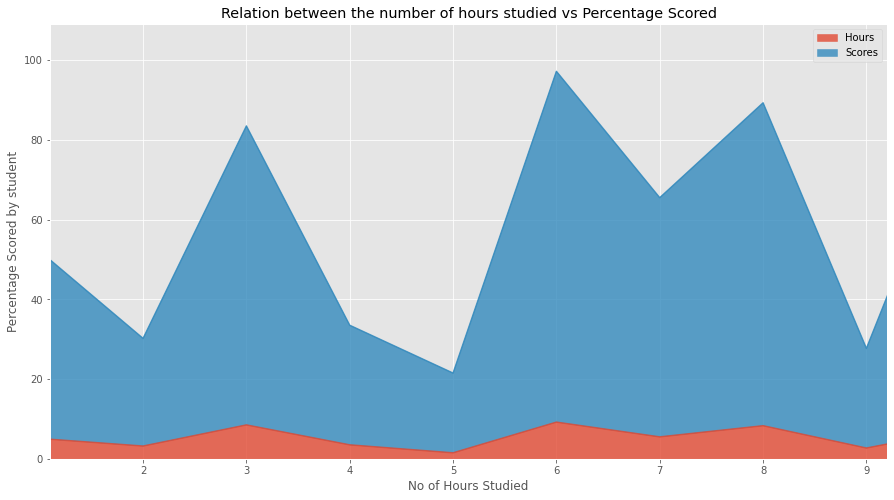

In [11]:
df.plot(kind = 'area' , alpha = 0.8 , stacked = True , figsize = (15 , 8) ,  xlim = (min(df.Hours) , max(df.Hours)))
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

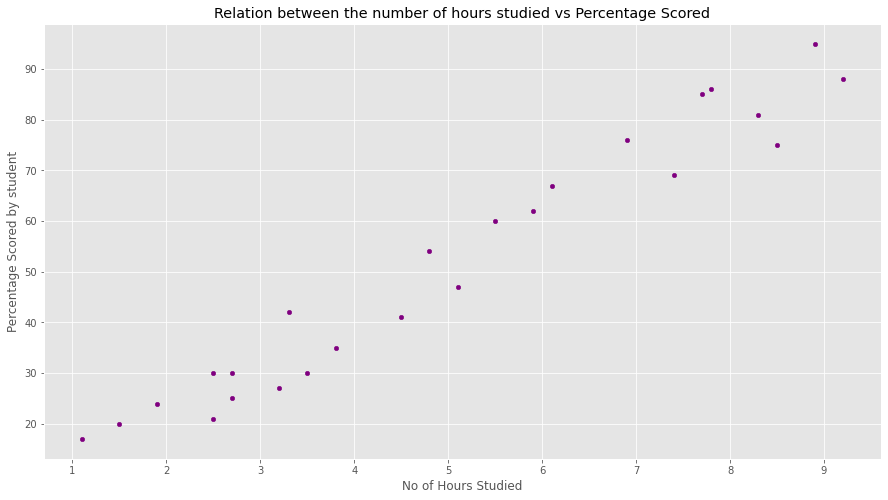

In [12]:
df.plot(kind = 'scatter' , x = 'Hours' , y = 'Scores' , color = 'purple' , figsize = (15 , 8))
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

In [14]:
x=np.asanyarray(df[['Hours']])#create the input feature array
y = np.asanyarray(df['Scores']) #create the output label 
train_x , test_x , train_y , test_y = train_test_split(x , y , test_size = 0.2 ,random_state = 2 )#split the training and the test data
lineareg = LinearRegression()#initialize the linear regression object
lineareg.fit(train_x , train_y)#and train the model
print("Training Completed\n")
print("Coefficients : " , lineareg.coef_)
print("Intercept : " , lineareg.intercept_)

Training Completed

Coefficients :  [9.94061514]
Intercept :  1.5079104828268726


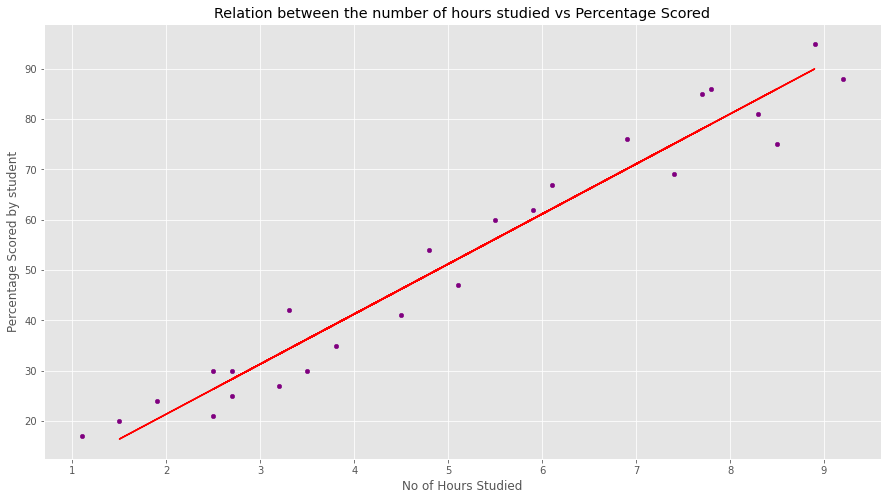

In [15]:
df.plot(kind = "scatter" , x = "Hours" , y = "Scores" , figsize = (15 , 8) , color = 'purple')
plt.plot(train_x , lineareg.coef_[0]*train_x + lineareg.intercept_ , color = 'red' )
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

In [11]:
y_target_label_predictor = lineareg.predict(test_x)


In [12]:
df2 = pd.DataFrame({'Actual' : test_y , 'Predicted' : y_target_label_predictor})
df2

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [18]:
#Displays the scores of our train and test results
print("Training Score : {} ".format(lineareg.score(train_x , train_y)))
print ("Test Score : {} ".format(lineareg.score(test_x , test_y)))

Training Score : 0.9423348138802985 
Test Score : 0.9735538080811826 


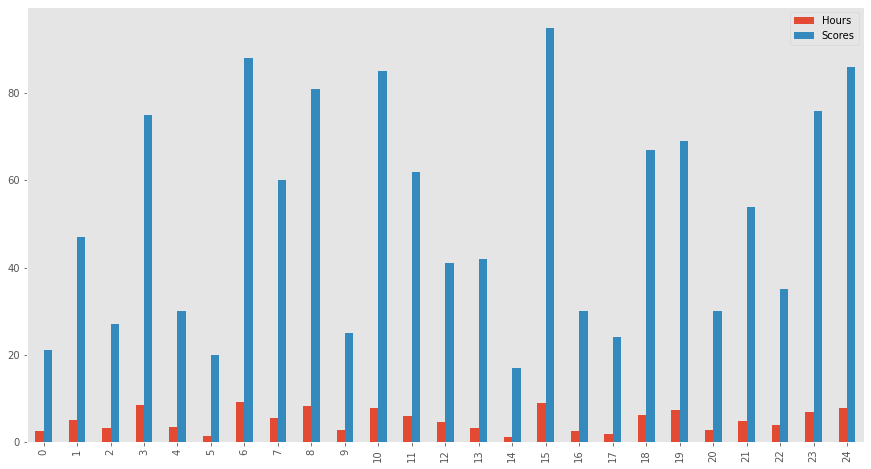

In [19]:
#Lets plot the graph of our Actual vs Predicted Results
df.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linewidth='0.5', color='navyblue')
plt.grid(which='minor', linewidth='0.5', color='brown')
plt.show()


In [16]:
#Lets test our model with the data we need to test upon given in the problem statement
hours = 9.25
final_score_predicted = lineareg.predict([[hours]])
print(f'No of hours : {hours}')
print(f'The final predicted score is : {final_score_predicted[0]}')

No of hours : 9.25
The final predicted score is : 93.45860055685799


In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Absolute Error is :{}".format(mean_absolute_error(test_y , y_target_label_predictor)))
print("Mean Squared Error is : {} ".format(mean_squared_error(test_y , y_target_label_predictor)))
print("R2 Score is : {}".format(r2_score(test_y , y_target_label_predictor)))

Mean Absolute Error is :4.877039354964484
Mean Squared Error is : 24.38762033985666 
R2 Score is : 0.9735538080811826
